# UN Crime Reports Visuals
---

Using the data collected from the 'collection' and 'cleaed' ipynb's, the the figures and visulas will be generated here.

In [175]:
# Dependencies and Setup
import pandas as pd
import os
import numpy as np
import plotly.express as px


import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import ticker



import hvplot.pandas
import requests

from scipy.stats import linregress

In [176]:
# Create file pathway and create new output directory and filepath
working_dir = os.path.join("..","UN_crime_reports")
crime_figs_dir = os.path.join(working_dir,"Crime_figs")
csv_dir = os.path.join(working_dir,"Crime_csv")

# Make directory for figures if does not already exist
if not os.path.exists(os.path.join(crime_figs_dir)):
    os.mkdir(os.path.join(working_dir,"Crime_figs"))

In [177]:
# Open high level summary table to plot the reporesented countries as the crime rate as a color/frequency map

high_lvl_crimerate_summary = pd.read_csv(os.path.join(csv_dir,'ideal_country_crime_high_summary.csv'))



In [178]:
# Make a simple datafram to translate between country name, iso2 and iso3 codes
iso_codes = pd.read_csv(os.path.join(working_dir,'Crime_csv','UN_combined_crime_pop.csv'))
iso_codes = iso_codes[['Country','ISO3_code']].rename(columns={
    'Country':'Country Name',
    'ISO3_code':'ISO3'}
    ).drop_duplicates()

# world maps is the ISO3 country codes to reference country geometry
high_lvl_crimerate_summary_ISO3 =  pd.merge(high_lvl_crimerate_summary,iso_codes,how='left', on= "Country Name")
high_lvl_crimerate_summary_ISO3 = high_lvl_crimerate_summary_ISO3.drop(columns=[
                                                                       'Number of Cities Meeting Criteria',
                                                                       'Country Name',
                                                                       'Most Recent Crime Report',
                                                                       'Oldest Crime Report Included',
                                                                       'Number of Annual Crime Reports Available'
                                                                       ])
#


## Geopandas World Map Plotting
---
Geopandas was imported to make a world map with political boundries where individual countries could be selected and colored based on the number of crimes reported to the United Nations.  This involved importing the world map, and converting the pandas dataframe into a geodataframe.  These dataframes are essentially identical, except that geodatafram has loacation data merged into the pandas dataframe.

### References Used
- https://geopandas.org/en/stable/docs/user_guide/data_structures.html
- https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate




In [179]:
# Load world map from geopandas
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Change column names to match both geodatafram and pandas dataframe before merge
world_map.columns = ['Population', 'continent', 'name', 'ISO3','gdp_md_est','geometry']
world_crime = world_map.merge(high_lvl_crimerate_summary_ISO3, how= 'left', 
                              on=['ISO3'] 
                              )


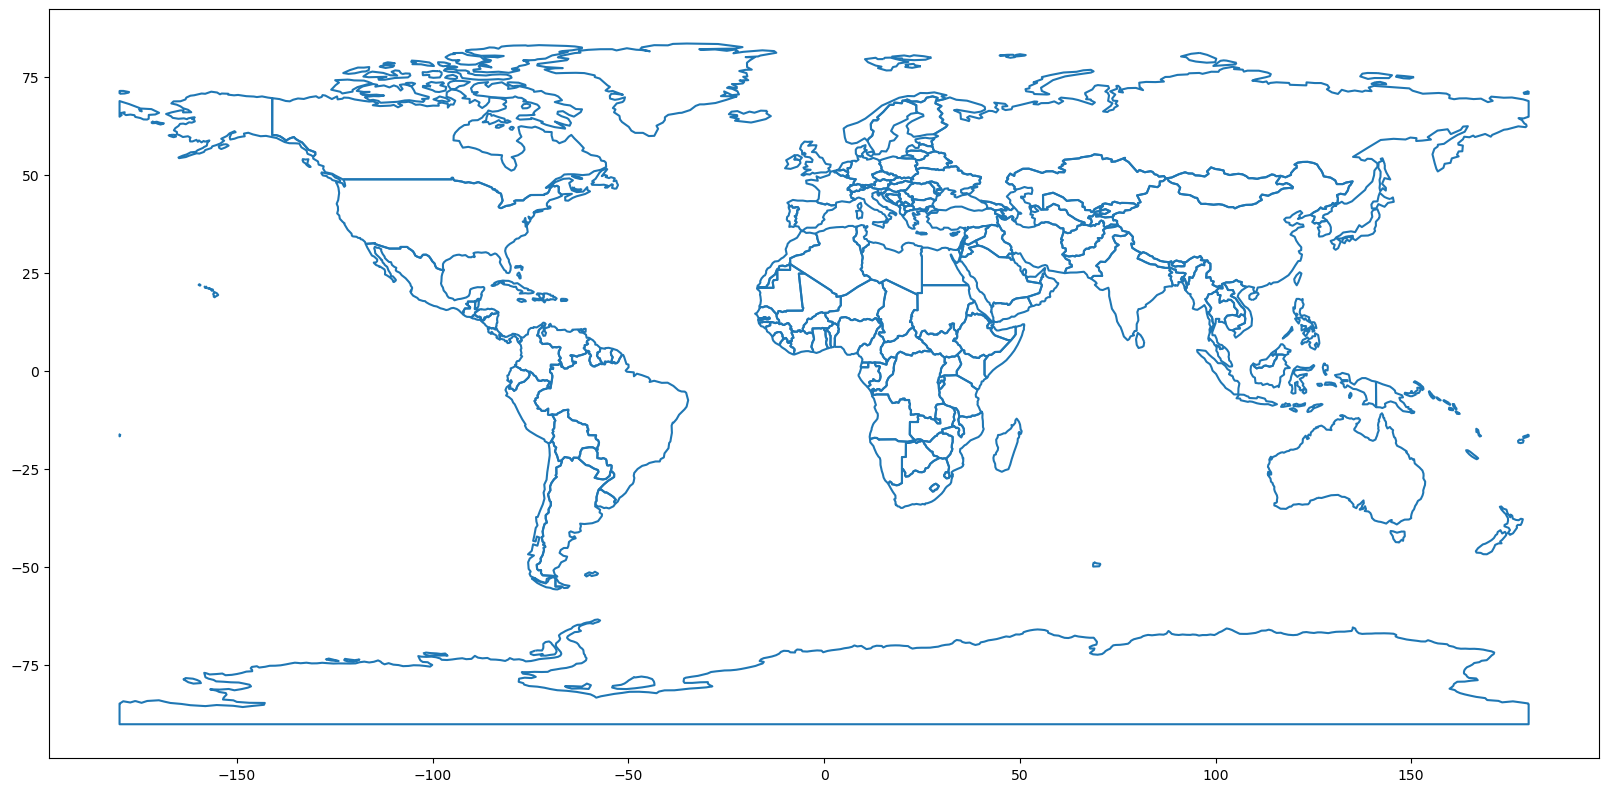

In [180]:
# Define the map political boundrys
ax = world_crime["geometry"].boundary.plot(figsize=(20,16))

In [181]:
world_crime

,Population,continent,name,ISO3,gdp_md_est,geometry,Country,Country Code,"Average Crimes Committed /100,000 People"
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,US,1932.91
...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


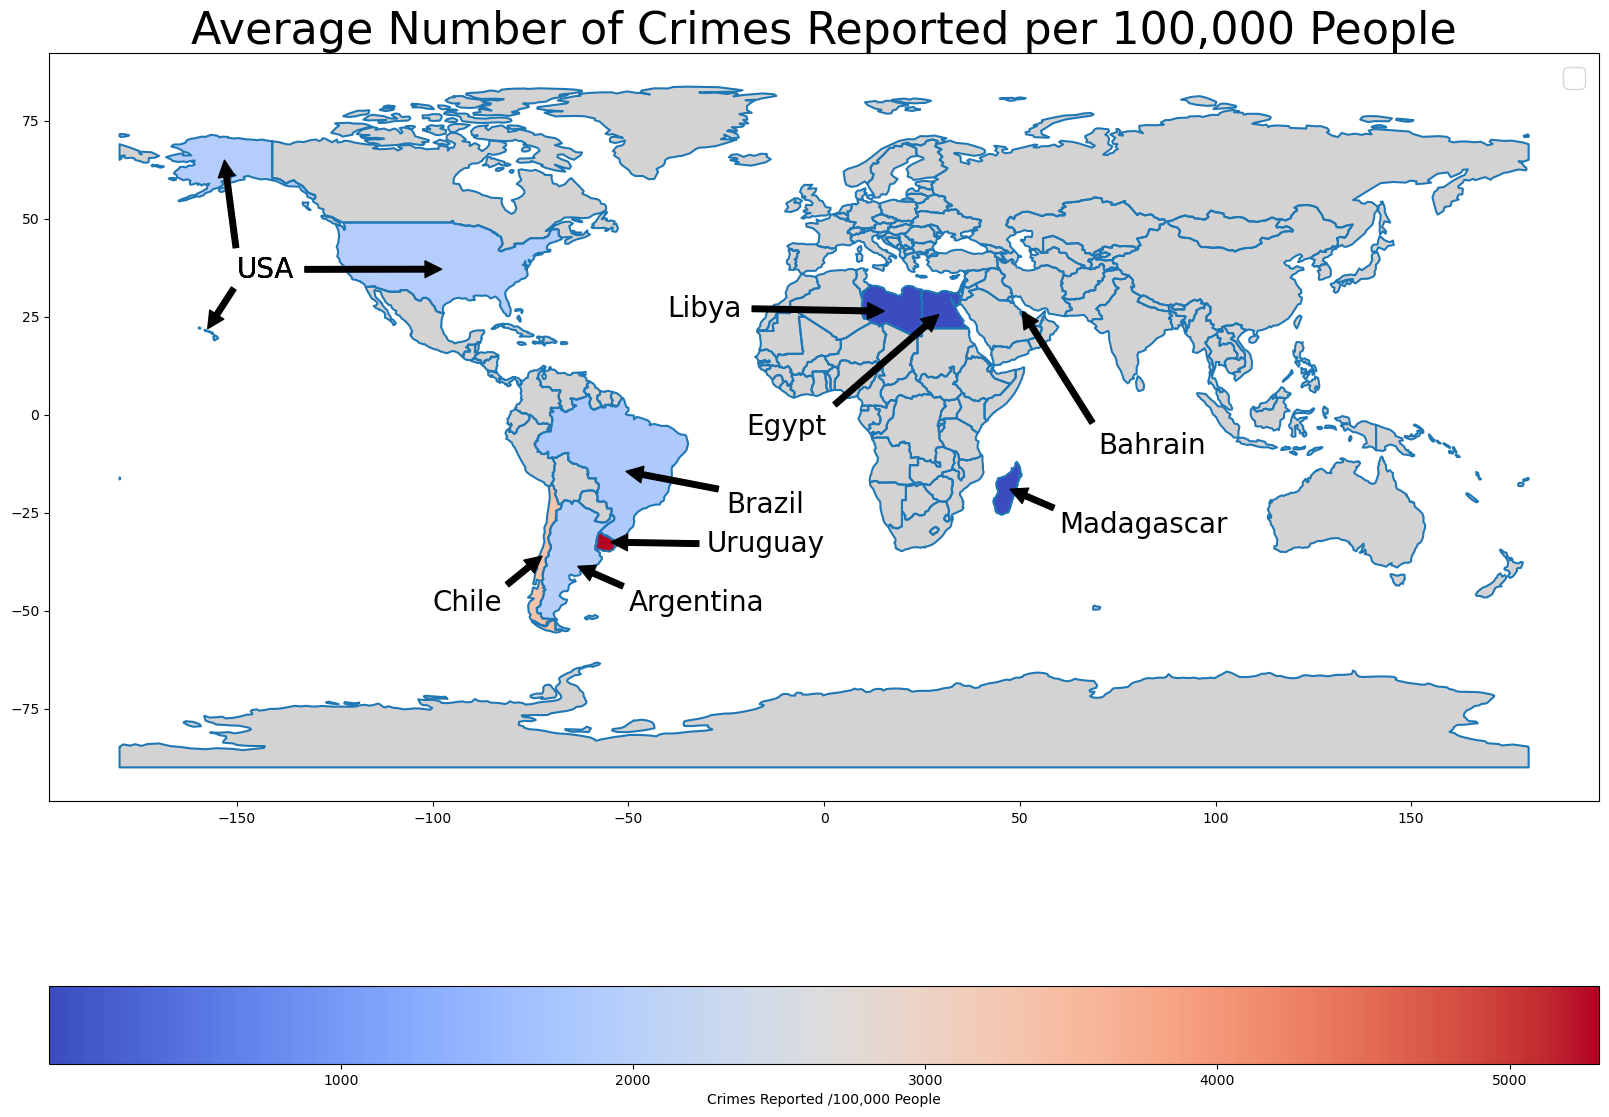

In [182]:


# plot data
# fig, ax = plt.subplot()
arrow_color = 'k'
ax = world_crime["geometry"].boundary.plot(figsize=(20,16))
world_crime.plot(column="Average Crimes Committed /100,000 People",
                 ax = ax,
                 cmap = 'coolwarm',
                 legend = True,
                 legend_kwds={'label':"Crimes Reported /100,000 People",'orientation':'horizontal'},
                 missing_kwds={'color':'lightgrey'}
                 )
ax.set_title("Average Number of Crimes Reported per 100,000 People", fontsize = 32)
ax.legend(fontsize = 20)

ax.annotate("Bahrain",xy=(49.6015,27.9434),xytext=(70,-10),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Madagascar",xy=(46.8691,-18.7669),xytext=(60,-30),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Libya",xy=(17.2692,26.3347),xytext=(-40,25),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Egypt",xy=(30.8025,26.8206),xytext=(-20,-5),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Brazil",xy=(-51.9553, -14.2350),xytext=(-25, -25),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("USA",xy=(-95.7129, 37.0902),xytext=(-150, 35),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("USA",xy=(-153.3691, 66.16051),xytext=(-150, 35),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("USA",xy=(-157.8581, 21.3099),xytext=(-150, 35),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Uruguay",xy=(-55.7658, -32.5228),xytext=(-30, -35),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Argentina",xy=(-63.6167, -38.4161),xytext=(-50, -50),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)
ax.annotate("Chile",xy=(-71.5430, -35.6751),xytext=(-100, -50),
            arrowprops={'color':arrow_color, 'shrink' : 0.05},
            fontsize=20)

plt.savefig(f"{crime_figs_dir}/average crime per 100k world map.png")
plt.show()

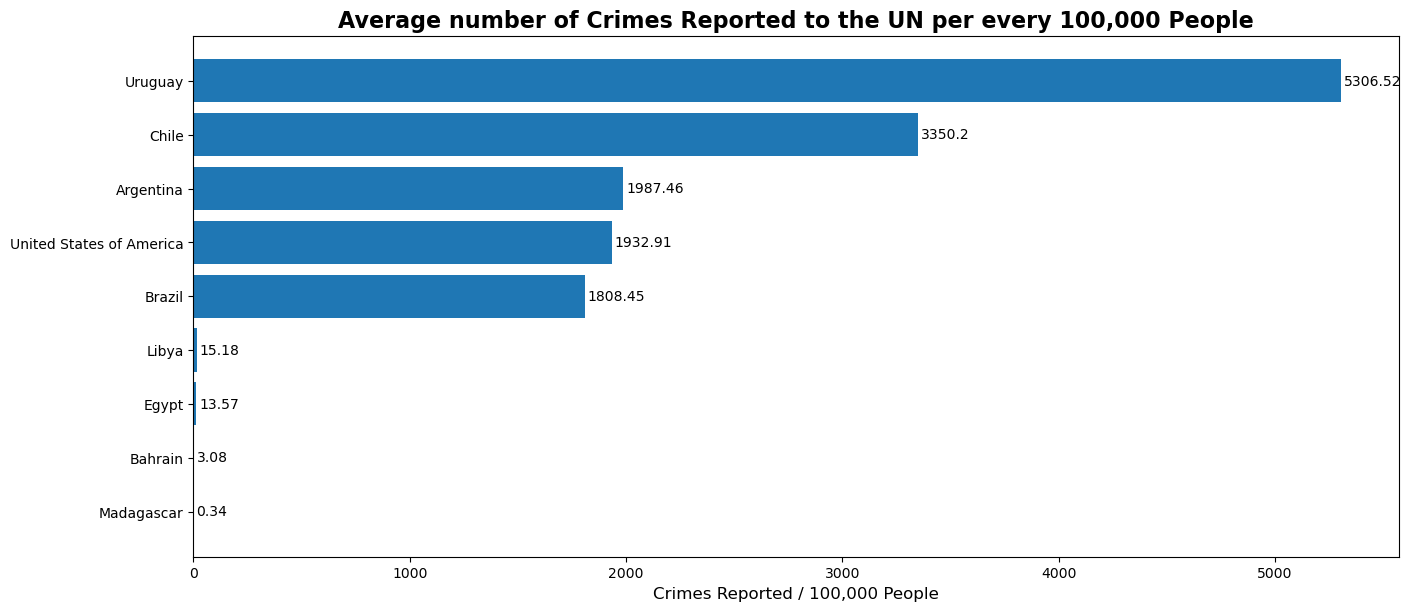

In [183]:
# Create horizontal bar chart to show distribution of average crime reports
# Ref: https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_commands.html
crimes = high_lvl_crimerate_summary['Average Crimes Committed /100,000 People']
countries = high_lvl_crimerate_summary['Country Name']

fig, ax = plt.subplots(figsize=(14,6), layout = 'constrained')
rects = ax.barh(countries,crimes, label= round(crimes,0))
ax.bar_label(rects, padding=2)

# plt.barh(countries, crimes)
ax.set_xlabel(f"Crimes Reported / 100,000 People", fontsize = 12)
ax.set_title(f"Average number of Crimes Reported to the UN per every 100,000 People", fontsize=16, fontweight = 'bold', wrap = True)

plt.savefig(f"{crime_figs_dir}/average crime per 100k barh chart.png")

plt.show()

In [184]:
high_lvl_crimerate_summary['Log of Crimes Committed /100,000 People'] = high_lvl_crimerate_summary['Average Crimes Committed /100,000 People'].apply(np.log)
high_lvl_crimerate_summary

,Country,Country Name,Country Code,Number of Cities Meeting Criteria,Most Recent Crime Report,Oldest Crime Report Included,Number of Annual Crime Reports Available,"Average Crimes Committed /100,000 People","Log of Crimes Committed /100,000 People"
0,MG,Madagascar,MG,4,2018,2017,2,0.34,-1.078810
1,BH,Bahrain,BH,36,2021,2016,6,3.08,1.124930
2,EG,Egypt,EG,16,2020,2016,4,13.57,2.607861
3,LY,Libya,LY,4,2017,2016,2,15.18,2.719979
4,BR,Brazil,BR,150,2020,2016,5,1808.45,7.500225
5,US,United States of America,US,288,2021,2016,6,1932.91,7.566782
6,AR,Argentina,AR,75,2020,2016,5,1987.46,7.594613
7,CL,Chile,CL,25,2020,2016,5,3350.20,8.116775
8,UY,Uruguay,UY,125,2020,2016,5,5306.52,8.576692


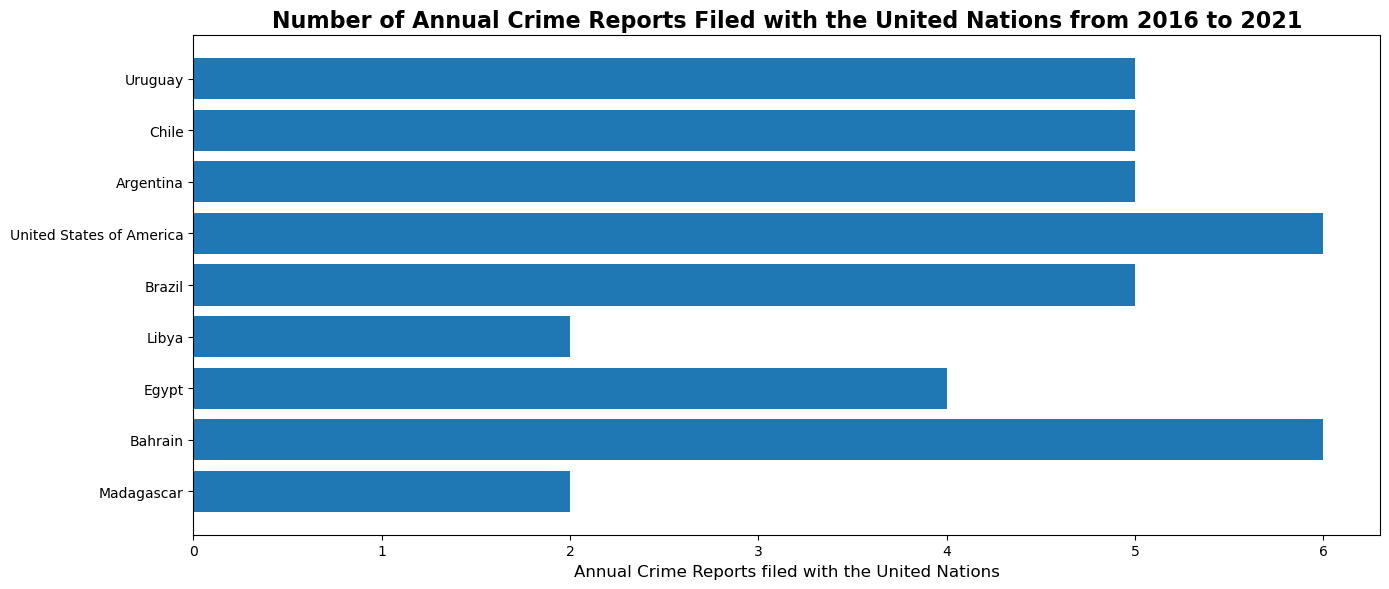

In [185]:
# Create chart of number of annula crime reports filed
crimes = high_lvl_crimerate_summary['Number of Annual Crime Reports Available']
countries = high_lvl_crimerate_summary['Country Name']

fig, ax = plt.subplots(figsize=(14,6), layout = 'tight')
ax.barh(countries,crimes)

# plt.barh(countries, crimes)
ax.set_xlabel(f"Annual Crime Reports filed with the United Nations", fontsize = 12)
ax.set_title(f"Number of Annual Crime Reports Filed with the United Nations from 2016 to 2021", fontsize=16, fontweight = 'bold', wrap = True)

plt.savefig(f"{crime_figs_dir}/annual crime reports filled barh chart.png")

plt.show()

In [186]:
# Create bar charts of reported yearly trend

# Call data
reported_ann_crime = pd.read_csv(os.path.join(working_dir,"Crime_csv","annual_reported_crime.csv"))

In [187]:
reported_ann_crime

,Country Name,2016,2017,2018,2019,2020,2021
0,Argentina,2019.77,2002.06,1985.88,1971.15,1958.43,NaN
1,Bahrain,3.20,3.10,3.04,3.02,3.06,3.09
2,Brazil,1836.59,1822.09,1807.69,1793.89,1782.00,NaN
3,Chile,3462.20,3408.53,3347.86,3288.42,3243.98,NaN
4,Egypt,14.02,13.75,13.49,NaN,13.02,NaN
5,Libya,15.30,15.07,NaN,NaN,NaN,NaN
6,Madagascar,NaN,0.35,0.34,NaN,NaN,NaN
7,United States of America,1965.33,1949.95,1936.16,1923.53,1914.24,1908.25
8,Uruguay,5322.57,5309.45,5301.95,5299.83,5298.79,NaN


In [194]:
# Create bar charts of reported yearly trend
reported_ann_crime.fillna('0',inplace = True).
reported_ann_crime




AttributeError: 'NoneType' object has no attribute 'reset_index'

In [190]:
ax = reported_ann_crime[reported_ann_crime.sort_index().index].plot(
    kind='bar',
    title = "Annual Reported Crime Rate per 100,000 People"
)

ax.set(xlabel= 'Country',ylabel = 'Number of Crimes Reported /1000,00 Poeple')
ax.legend(title = 'Reported Year')

KeyError: 'None of [RangeIndex(start=0, stop=9, step=1)] are in the [columns]'

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

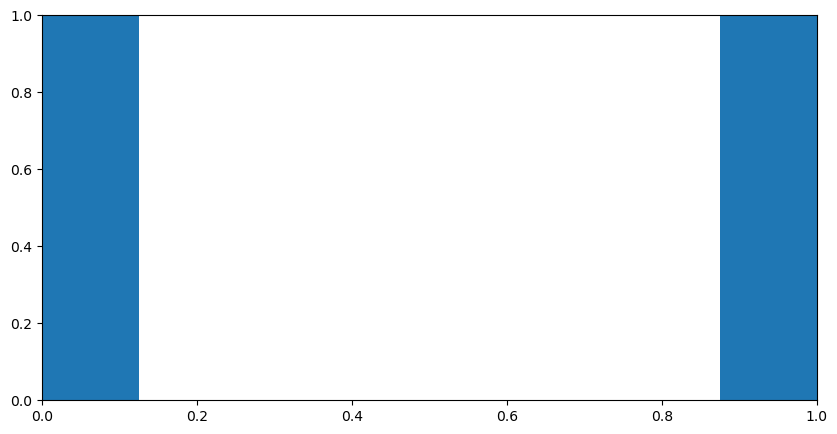

In [174]:
# Create bar charts of reported yearly trend
reported_ann_crime.fillna('0',inplace = True)
reported_ann_crime

# x_labels = reported_ann_crime['Country Name']
# crime_1= reported_ann_crime['2016']
# crime_2=reported_ann_crime['2017']
# crime_3=reported_ann_crime['2018']
# crime_4=reported_ann_crime['2019']
# crime_5= reported_ann_crime['2020']
# crime_6=reported_ann_crime['2021']

# x = np.arange(len(reported_ann_crime))
# width = 0.25 # width of bars

# rects1 = ax.bar(x-width*2/3,crime_1,width)
# rects2 = ax.bar(x-width/3,crime_2,width)
# rects3 = ax.bar(x,crime_3,width)
# rects4 = ax.bar(x+width/3,crime_4,width)
# react5 = ax.bar(x+width*2/3,crime_5,width)
# rects6 = ax.bar(x+width,crime_6,width)

pos = list(range(len(reported_ann_crime['2016'])))
width = 0.25


# x = np.arange(len(reported_ann_crime))
# x_labels = reported_ann_crime['Country Name']
# width = 0.5 # width of bars
# multiplier = 0

fig, ax = plt.subplots(figsize=(10,5))

# for rate, year in reported_ann_crime:
#     offset = width * multiplier
#     rects = ax.bar(x+offset, rate, width, label = rate)
#     ax.bar_label(rects, padding = 3)
#     multiplier += 1


plt.bar(pos,reported_ann_crime['2016'], width, color = 'C0')
plt.bar([p + width for p in pos], reported_ann_crime['2017'], width,color = 'C1')
plt.bar([p + width*2 for p in pos], reported_ann_crime['2018'], width,color = 'C2')
plt.bar([p + width*3 for p in pos], reported_ann_crime['2019'], width,color = 'C3')
plt.bar([p + width*4 for p in pos], reported_ann_crime['2020'], width,color = 'C4')
plt.bar([p + width*5 for p in pos], reported_ann_crime['2021'], widthcolor = 'C5')


ax.set_ylabel('Crimes Reported per 100,000 people')
ax.set_title('Annual Reported Crime Rate per 100,000 People')
ax.set_xticks([p +1.5*width for p in pos])
ax.set_xlabels(reported_ann_crime['Country Name'])

plt.xlim(min(pos)-width, max(pos)+width*6)
plt.ylim([0,max(reported_ann_crime['2016']+
                reported_ann_crime['2017']+
                reported_ann_crime['2018']+
                reported_ann_crime['2019']+
                reported_ann_crime['2020']+
                reported_ann_crime['2021'])])

plt.legend(['2016', '2017', '2018', '2019', '2020', '2021'], loc='upper left')

plt.grid()

plt.show()



In [34]:
for row in reported_ann_crime:
    plt.bar(row['Country Name'],row)
    plt.show()

TypeError: string indices must be integers

In [30]:
plt.bar(reported_ann_crime['Country Name'],reported_ann_crime[0])

KeyError: 0